# SemEval-2016 Dataset Statistics

In [23]:
from pathlib import Path
from bs4 import BeautifulSoup


train_file = Path.cwd().joinpath("reference/subtask1_rr_en/train.xml")
soup = None

with train_file.open(encoding="utf-8") as f:
    soup = BeautifulSoup(f.read().strip(), "lxml-xml")

if soup is None:
    raise Exception("Can't read xml file")

sentence_nodes = soup.find_all("sentence")

In [24]:
sentences = []
entities = []

for n in sentence_nodes:
    s = n.find("text").string
    e_count = 0
    if n.find("Opinions"):
        for c in n.find("Opinions").contents:
            if c.name == "Opinion":
                e = {
                    "sentence_id": n["id"],
                    "target": c["target"],
                    "category": c["category"],
                    "polarity": c["polarity"]
                }
                entities.append(e)
                e_count += 1

    sentences.append({
        "sentence_id": n["id"],
        "sentence": s,
        "entities":  e_count
    })

print("{} sentences.".format(len(sentences)))
print("{} entities.".format(len(entities)))

2000 sentences.
2507 entities.


In [25]:
import pandas as pd

sentences = pd.DataFrame(sentences)
entities = pd.DataFrame(entities)

In [26]:
sentences.head(5)

,entities,sentence,sentence_id
0,1,Judging from previous posts this used to be a ...,1004293:0
1,1,"We, there were four of us, arrived at noon - t...",1004293:1
2,1,"They never brought us complimentary noodles, i...",1004293:2
3,2,The food was lousy - too sweet or too salty an...,1004293:3
4,1,"After all that, they complained to me about th...",1004293:4


In [27]:
entities.head(5)

,category,polarity,sentence_id,target
0,RESTAURANT#GENERAL,negative,1004293:0,place
1,SERVICE#GENERAL,negative,1004293:1,staff
2,SERVICE#GENERAL,negative,1004293:2,NULL
3,FOOD#QUALITY,negative,1004293:3,food
4,FOOD#STYLE_OPTIONS,negative,1004293:3,portions


### Label Distribution

In [28]:
%matplotlib inline

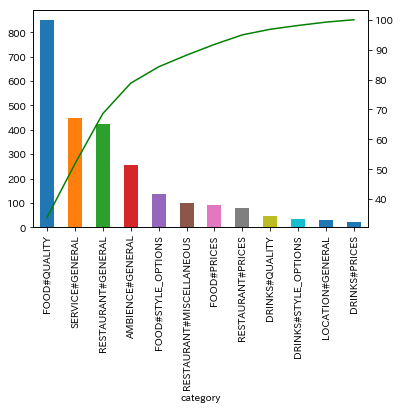

In [33]:
entities.groupby(["category"]).count()["target"].sort_values(ascending=False).plot(kind="bar")
(entities.groupby(["category"]).count()["target"].sort_values(ascending=False).cumsum() * 100 / len(entities)).plot.line(secondary_y=True, style="g", rot=90)

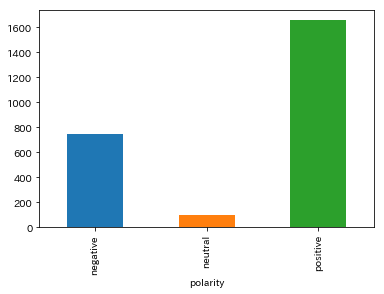

In [29]:
entities.groupby(["polarity"]).count()["target"].plot.bar()

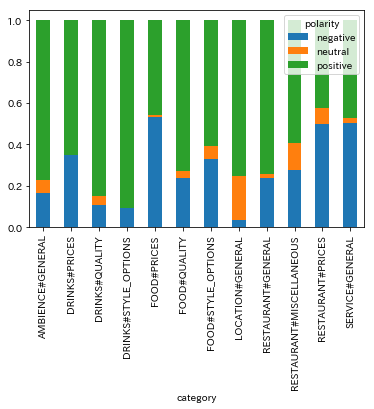

In [30]:
entities.groupby(["polarity", "category"]).count()["target"].divide(entities.groupby(["category"]).count()["target"]).unstack("polarity").plot.bar(stacked=True)

### Sentence Distribution

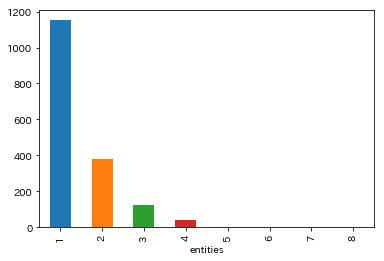

In [32]:
sentences[sentences["entities"] > 0].groupby(["entities"]).count()["sentence_id"].plot.bar()